# Exercise 4.9 Part 2

## Contents
- Importing analysis and visualization libraries
- Importing ords_prods_all df
3. Created a histogram of the "orders_hour_of_day" column
4. Bar Chart demonstrating distribution of orders among customer loyalty designation
5. Line chart demonstrating avg item expenditure based on time of day
    - utilized sampling method
6. Line chart demonstrating connection between age and number of dependants (or lack thereof)
7. Scatterplot demonstrating link between age and spending power (income)
- trimming off unnecessary columns
8. Exporting df via pickle

### Importing analysis and visualization libraries

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Setting path to Achievement 4 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'

### Importing ords_prods_all df (orders, products, AND customers df from Exercise 4.9.1) as ords_prods_all

In [5]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [6]:
ords_prods_all.shape

(32404859, 27)

In [7]:
pd.options.display.max_columns = None

In [8]:
ords_prods_all.tail()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404856,758936,203436,1,2,7,NaN,True,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,Mid range product,Regularly busy,Average orders,New customer,Low spender,NaN,Male,Washington,52,3/31/2018,2,married,116193
32404857,2745165,203436,2,3,5,15.0,False,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,Mid range product,Slowest days,Fewest orders,New customer,Low spender,Regular_customer,Male,Washington,52,3/31/2018,2,married,116193
32404858,3093936,205420,1,4,14,NaN,True,28818,8,0,Hot Oatmeal Multigrain Raisin,130,14,10.3,Mid range product,Slowest days,Most orders,Regular customer,Low spender,NaN,Male,Tennessee,71,11/12/2019,1,married,142822


## 2. Bar Chart, Histogram, Scatterplot and Line Chart in notebook 4.9 - Data visualization with Python

## 3. Create a histogram of the "orders_hour_of_day" column.
Provide Instacart stakeholders with descriptive findings about sales. 

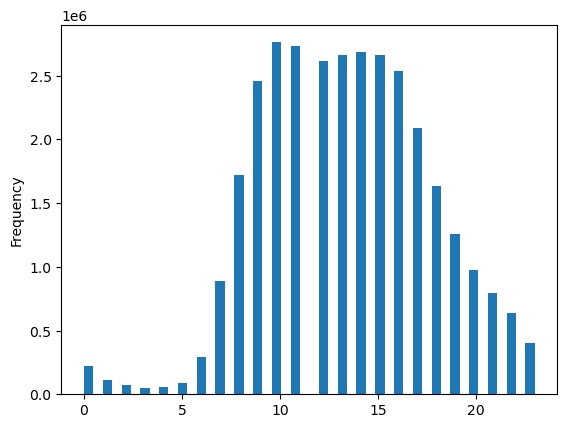

In [9]:
hist_ohod = ords_prods_all['orders_hour_of_day'].plot.hist(bins=48)

We can see the busiest hour for orders is 10am, followed by 11am. 9am to 4pm could be considered peak hours.

The slowest period would be midnight to 5 am, with 3am as the slowest.

In [10]:
# Exporting histogram to Visualizations folder

hist_ohod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ohod.png'))

## 4. Marketing team is curious about distribution of orders among customers in terms of loyalty.
Create a bar chart from the "loyalty_flag" column


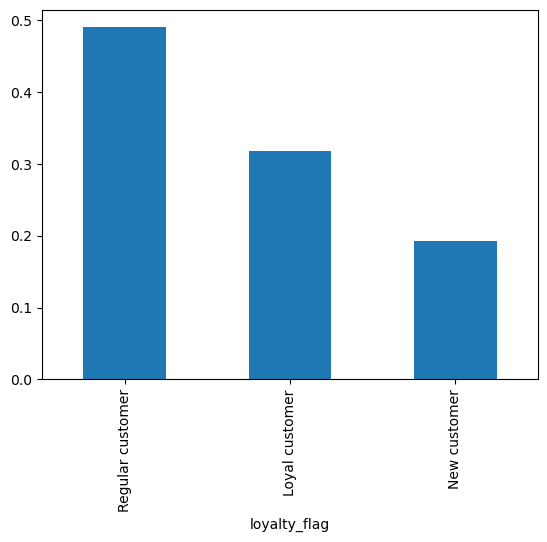

In [11]:
loyalty_bar = ords_prods_all['loyalty_flag'].value_counts(['order_id']).plot.bar()

Distribution of orders among customers by ['loyalty_flag'],
- X axis is proportion of total orders, by ['order_id']

We see that regular customers account for about half of total orders, loyal customers account for just over 30%, and new customers around 20% of total orders.

In [12]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
(Hint: To check this, you need to use an accurate sample for your line chart!)

In [13]:
np.random.seed(24)

In [14]:
#80/20 split

dev = np.random.rand(len(ords_prods_all)) <= 0.8

In [15]:
# a list of T/F's the length of rows in ords_prods_all

dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# the 80% sample df
big = ords_prods_all[dev]

In [17]:
# the 20% sample df
small = ords_prods_all[~dev]

In [18]:
len(ords_prods_all)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
# Reduce samples to only columns necessary for the chart

df_small = small[['orders_hour_of_day', 'prices']]

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

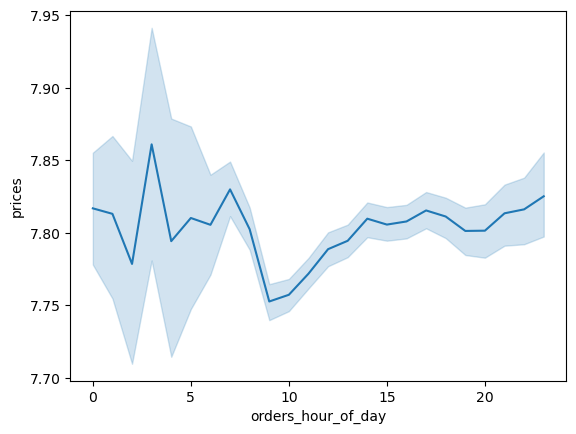

In [21]:
priceline = sns.lineplot(data = df_small, x= 'orders_hour_of_day', y = 'prices')

We can observe high prices as well as high variance during the hours between midnight and 5am that we previously established as the slowest by order traffic.

Prices dip throughout the morning until about 9am, and then graudally rise.

Important to note that the X axis for prices is pretty scoped in throughout - max variance across the predicted range of values is about 25 cents, from 7.70 to 7.95.

In [22]:
priceline.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'priceline_ohod.png'))

## 6. Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

- First, determine whether there's a connection between age and family situation by creating a line chart exploring the connection between age and number of dependents.

Repeating seed process to make smaller representative sample for which to plot line data.

In [23]:
np.random.seed(9)

In [24]:
dev_1 = np.random.rand(len(ords_prods_all)) <= 0.8

In [31]:
dev_1

array([ True,  True,  True, ..., False,  True, False])

In [32]:
big_1 = ords_prods_all[dev]

In [33]:
small_1 = ords_prods_all[~dev]

In [34]:
df_1 = small_1[['Age', 'n_dependants']]

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

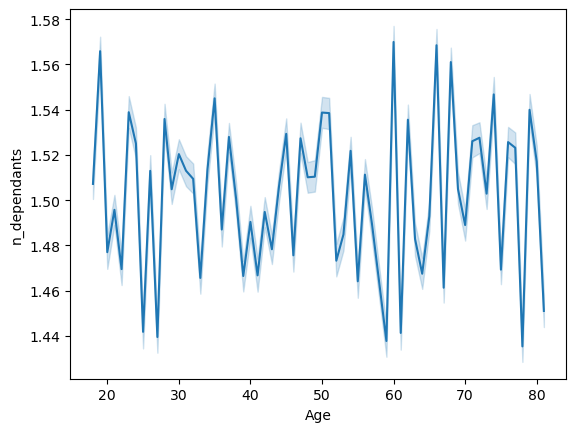

In [39]:
fam_line = sns.lineplot(data = df_1, x = 'Age', y = 'n_dependants')

### There looks to be little correlation between age and number of dependants.

Tempted to rerun this with the big (80%) dataset but from the sample size we see high variance across the ages, and yet the whole graph doesn't stray far from 1.5 for every age. 

In [41]:
fam_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_dependants.png'))

## 7. Explore the connection between age and spending power(income)
-  To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


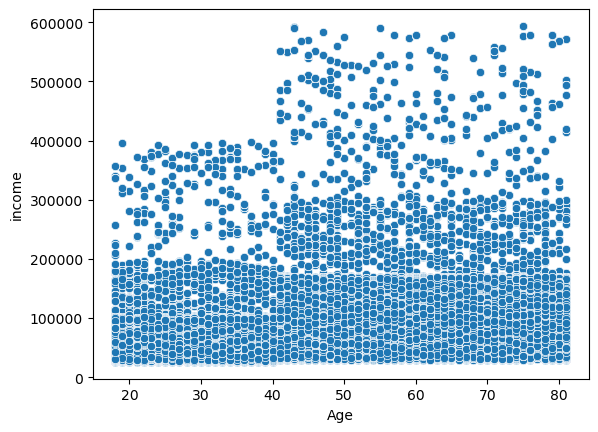

In [42]:
income_age = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_all)

### Seeing majority of incomes between ~30K-200K, 
- with scattered incomes up to 400K for ages up to ~40, and up to 600K for 40-80.
- thicker distribution between 200K and 300K for ages 40-80 as well

In [43]:
income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_age_scatterplot.png'))

### That's it for the task!

Going to use this notebook to trim off unneccessary columns:
- [‘max_order’,’avg_prod_price’,’ordering_behavior’,’_merge’]

In [28]:
ords_prods_all = ords_prods_all.drop(columns = ['max_order','avg_prod_price','ordering_behavior','_merge'])

KeyError: "['max_order', 'avg_prod_price', 'ordering_behavior', '_merge'] not found in axis"

In [29]:
ords_prods_all.tail(10)

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
32404849,576295,202557,12,3,10,11.0,False,43553,14,1,Orange Energy Shots,64,7,3.7,Low range product,Slowest days,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404850,960088,202557,13,4,12,15.0,False,43553,3,1,Orange Energy Shots,64,7,3.7,Low range product,Slowest days,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404851,343962,202557,14,0,10,3.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Busiest days,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404852,2329472,202557,15,6,12,6.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404853,694731,202557,16,1,14,2.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Busiest days,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899
32404856,758936,203436,1,2,7,NaN,True,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,Mid range product,Regularly busy,Average orders,New customer,Low spender,NaN,Male,Washington,52,3/31/2018,2,married,116193
32404857,2745165,203436,2,3,5,15.0,False,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,Mid range product,Slowest days,Fewest orders,New customer,Low spender,Regular_customer,Male,Washington,52,3/31/2018,2,married,116193
32404858,3093936,205420,1,4,14,NaN,True,28818,8,0,Hot Oatmeal Multigrain Raisin,130,14,10.3,Mid range product,Slowest days,Most orders,Regular customer,Low spender,NaN,Male,Tennessee,71,11/12/2019,1,married,142822


In [30]:
ords_prods_all.shape

(32404859, 27)

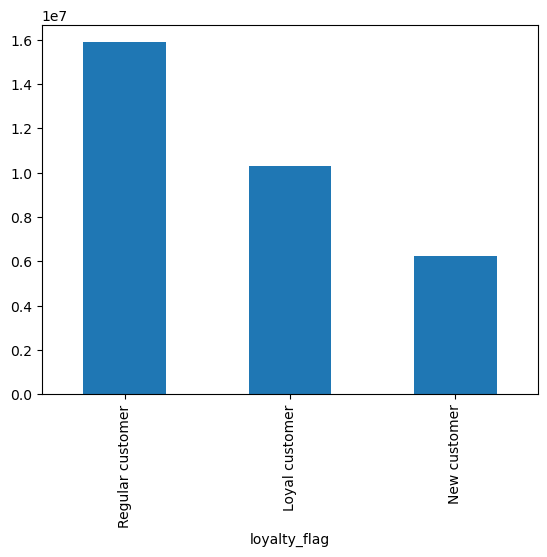

In [34]:
# Brand Loyalty check with ords_prods_all (including users with less than 5 orders)
loyalty_bar = ords_prods_all['loyalty_flag'].value_counts(dropna = False).plot.bar()

In [49]:
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))